In [1]:
# import library
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

In [2]:
# create a connection 
conn = psycopg2.connect(
    host="localhost",
    database="internproject",   
    user="postgres",       
    password="Yusufrazakhan12@", 
    port="5432"
)

In [3]:
cur = conn.cursor()

# Table names fetch
cur.execute("""
    SELECT table_name 
    FROM information_schema.tables
    WHERE table_schema = 'supermart_grocery_sales';
""")

tables = cur.fetchall()

# Print table names
print("Tables in database:")
for table in tables:
    print(table[0])

Tables in database:


### Load Data Set

In [246]:
# fetch table 
data = pd.read_sql('SELECT * FROM "supermart_grocery_sales";', conn)

In [247]:
# check first 3 row dataset 
data.head(3)

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu


### Data Understanding

In [248]:
# check shape of data 
data.shape

(9994, 11)

In [249]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   customer_name  9994 non-null   object 
 2   category       9994 non-null   object 
 3   sub_category   9994 non-null   object 
 4   city           9994 non-null   object 
 5   order_date     9994 non-null   object 
 6   region         9994 non-null   object 
 7   sales          9994 non-null   int64  
 8   discount       9994 non-null   float64
 9   profit         9994 non-null   float64
 10  state          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [250]:
data.describe()

,sales,discount,profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


### Data Preprocessing

In [251]:
# check null values 
data.isnull().sum()

order_id         0
customer_name    0
category         0
sub_category     0
city             0
order_date       0
region           0
sales            0
discount         0
profit           0
state            0
dtype: int64

In [252]:
# check for duplicate
data.drop_duplicates()

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


#### Convert date column to date time formate

In [267]:
# check data type of date time column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   customer_name  9994 non-null   object        
 2   category       9994 non-null   object        
 3   sub_category   9994 non-null   object        
 4   city           9994 non-null   object        
 5   order_date     9994 non-null   datetime64[ns]
 6   region         9994 non-null   object        
 7   sales          9994 non-null   int64         
 8   discount       9994 non-null   float64       
 9   profit         9994 non-null   float64       
 10  state          9994 non-null   object        
 11  Order_Day      9994 non-null   int32         
 12  Order_Month    9994 non-null   int32         
 13  Order_year     9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(7)
memory u

In [268]:
data["order_date"]

0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9989   2015-12-24
9990   2015-12-07
9991   2017-06-06
9992   2018-10-16
9993   2018-04-17
Name: order_date, Length: 9994, dtype: datetime64[ns]

In [269]:
data['order_date'].unique()

<DatetimeArray>
['2017-08-11 00:00:00', '2017-12-06 00:00:00', '2016-11-10 00:00:00',
 '2015-09-06 00:00:00', '2018-04-15 00:00:00', '2017-05-12 00:00:00',
 '2016-11-22 00:00:00', '2015-11-11 00:00:00', '2015-05-13 00:00:00',
 '2015-08-27 00:00:00',
 ...
 '2015-10-27 00:00:00', '2016-01-24 00:00:00', '2015-01-10 00:00:00',
 '2015-06-05 00:00:00', '2016-01-23 00:00:00', '2017-08-20 00:00:00',
 '2016-05-16 00:00:00', '2015-03-16 00:00:00', '2016-08-29 00:00:00',
 '2017-06-04 00:00:00']
Length: 1236, dtype: datetime64[ns]

In [270]:
data["order_date"] = pd.to_datetime(data['order_date'],format = "mixed" , dayfirst= True)

In [271]:
# now we check again column 
data["order_date"]

0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9989   2015-12-24
9990   2015-12-07
9991   2017-06-06
9992   2018-10-16
9993   2018-04-17
Name: order_date, Length: 9994, dtype: datetime64[ns]

#### Here you can see the datatype is changed from object to date and time 

In [272]:
# extract Day month and year from order_date column
data['Order_Day'] = data['order_date'].dt.day 
data['Order_Month'] = data['order_date'].dt.month
data['Order_year'] = data['order_date'].dt.year

In [273]:
data.head(3)

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state,Order_Day,Order_Month,Order_year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11,8,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11,8,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,6,12,2017


In [274]:
# Group by on the basis of Category
df = data.groupby("category")
df.first(3)

,sales,discount,profit,Order_Day,Order_Month,Order_year
category,,,,,,
Bakery,791,0.23,181.93,6,9,2015
Beverages,749,0.18,149.80,11,8,2017
"Eggs, Meat & Fish",701,0.10,308.44,6,9,2015
Food Grains,2360,0.21,165.20,6,12,2017
Fruits & Veggies,896,0.25,89.60,10,11,2016
Oil & Masala,1254,0.12,401.28,11,8,2017
Snacks,1903,0.13,437.69,6,9,2015


## EDA (Exploratory Data Analysis)

### 1 Distribution of Sales by Category 

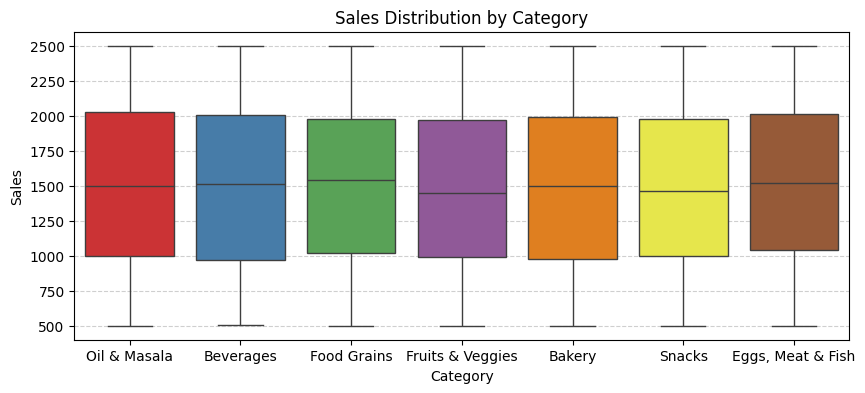

In [275]:
# plot graph 
plt.figure(figsize=(10, 4))
sns.boxplot(x='category', y='sales', data=data, palette='Set1')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.grid(axis='y', linestyle='--', alpha=0.6)  # this is for background 
plt.show()

###### . The graph shows how sales are spread across different categories.
###### . Sales are almost similar in all categories, with no big difference between them.
###### . This means no single category has much higher or lower sales than the others.

### 2 Total sales by category

In [276]:
# firstly,we group by Category and get the total number of sales for each category
sales_cat = data.groupby("category")["sales"].sum()

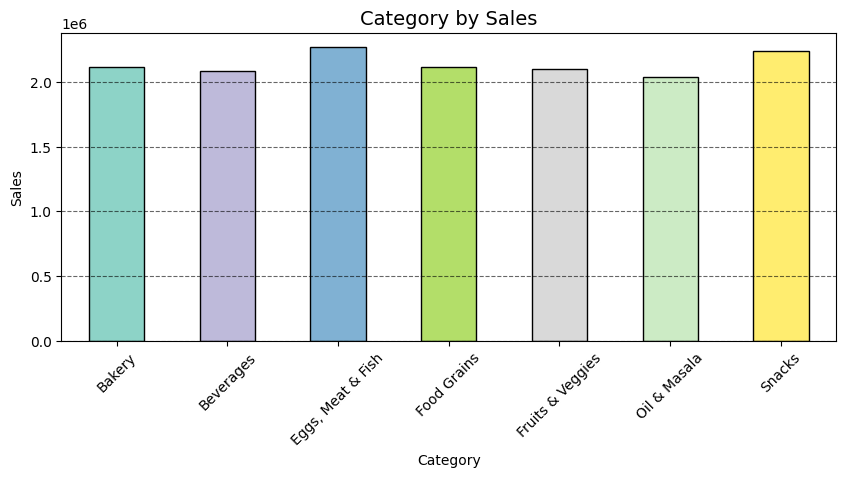

In [278]:
# we create a plot of sales by category Sales_category.plot(kind='bar')
colors = plt.cm.Set3(np.linspace(0, 1, len(sales_cat)))
plt.figure(figsize=(10,4))
sales_cat.plot(kind='bar',color=colors,edgecolor='black')
plt.title('Category by Sales', fontsize = 14) 
plt.grid(axis='y', linestyle='--', alpha=0.6, color = "black")
plt.xlabel('Category') 
plt.ylabel('Sales') 
plt.xticks(rotation=45)
plt.show()

###### The bar chart shows total sales for each category,Sales are fairly similar across all categories, with Category Eggs,Meat,Fish and Snacks

having the highest sales,Category Oil and Masala shows the lowest sales compared to the other categories.

### 3 Sales Trends Over The Time

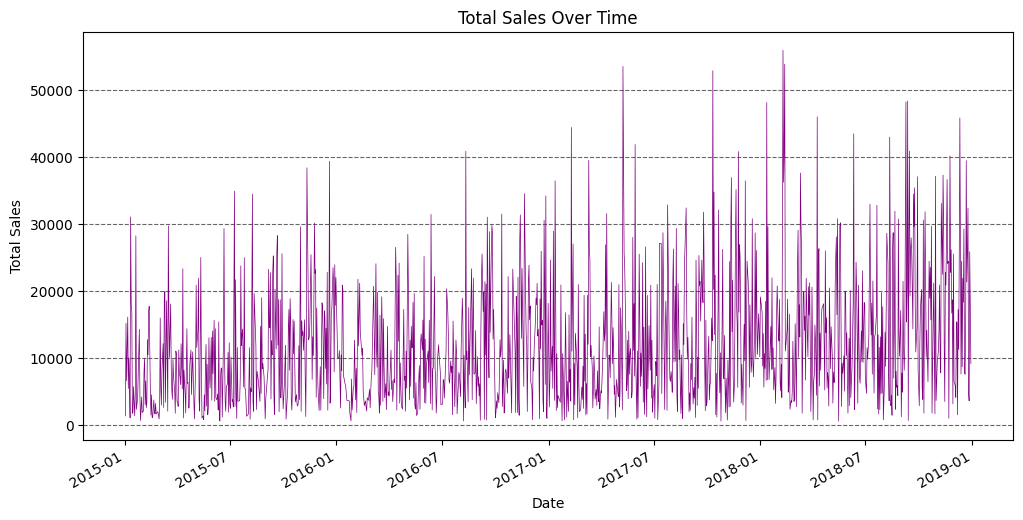

In [279]:
plt.figure(figsize=(12, 6))
data_group = data.groupby('order_date')['sales'].sum().plot(color = 'purple' , linewidth = 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.6,color = "black") 
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.xticks(fontsize=10)
plt.ylabel('Total Sales')
plt.yticks(fontsize=10)
plt.show()

###### The graph shows total sales over time from 2015 to 2019.
###### Sales are lowest in 2015, increase gradually during 2016–2017, and reach their highest levels in 2018.
###### Overall, 2016–2017 show average sales, while 2018 records the highest sales across the period.

In [280]:
#Extract month from the order date
data['month_no'] = data['order_date'].dt.month
data['Month'] = pd.to_datetime(data['order_date']).dt.strftime('%B')
data['year'] = data['order_date'].dt.year

In [281]:
data.head(2)

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state,Order_Day,Order_Month,Order_year,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11,8,2017,8,August,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11,8,2017,8,August,2017


### 4 Sum up Sales by Month

In [282]:
# Sum up sales by month
monthly_sales = data.groupby('Month')['sales'].sum().reset_index()
#Sort the data by month
monthly_sales_sorted = monthly_sales.sort_values(by='Month')

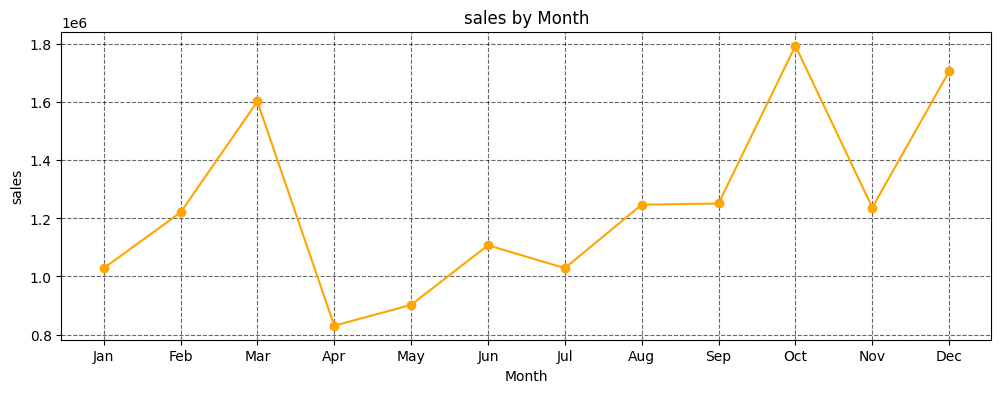

In [283]:
# Create the line chart
plt.figure(figsize=(12, 4))
plt.plot(monthly_sales_sorted['Month'],
monthly_sales_sorted['sales'], marker='o', color = "orange")
plt.title('sales by Month')
plt.xlabel('Month')
plt.ylabel('sales')
plt.xticks(monthly_sales_sorted['Month'], ['Jan', 'Feb', 'Mar',
'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True ,linestyle='--', alpha=0.6,color = "black")
plt.show()


###### Sales perform best in March, October, and December,
###### while April shows the weakest performance, indicating seasonal demand patterns.

### 5 Sum up Sales by year

In [284]:
#we want to find the Yearly Sales
# we group by Year and get the total number of sales for each year
Yr_sales=data.groupby("year")["sales"].sum()

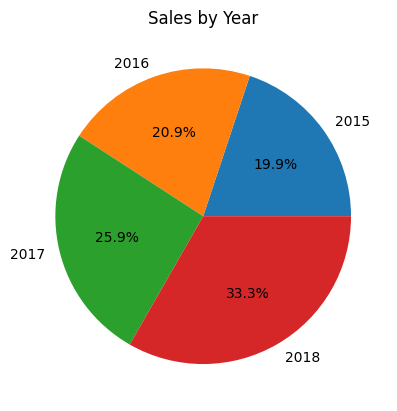

In [285]:
#we create a pie chart with the sales by year
plt.pie(Yr_sales, labels=Yr_sales.index,autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()

##### The year 2017 and 2018 had more than 50 percent of the total sales which implies the sales increase as the year increases

### 7 Correlation Heatmap 

In [286]:
# numeric data 
numeric_data = data.select_dtypes(include=['int64','float64','datetime64'])
numeric_data.head()

,order_date,sales,discount,profit
0,2017-08-11,1254,0.12,401.28
1,2017-08-11,749,0.18,149.80
2,2017-12-06,2360,0.21,165.20
3,2016-11-10,896,0.25,89.60
4,2016-11-10,2355,0.26,918.45


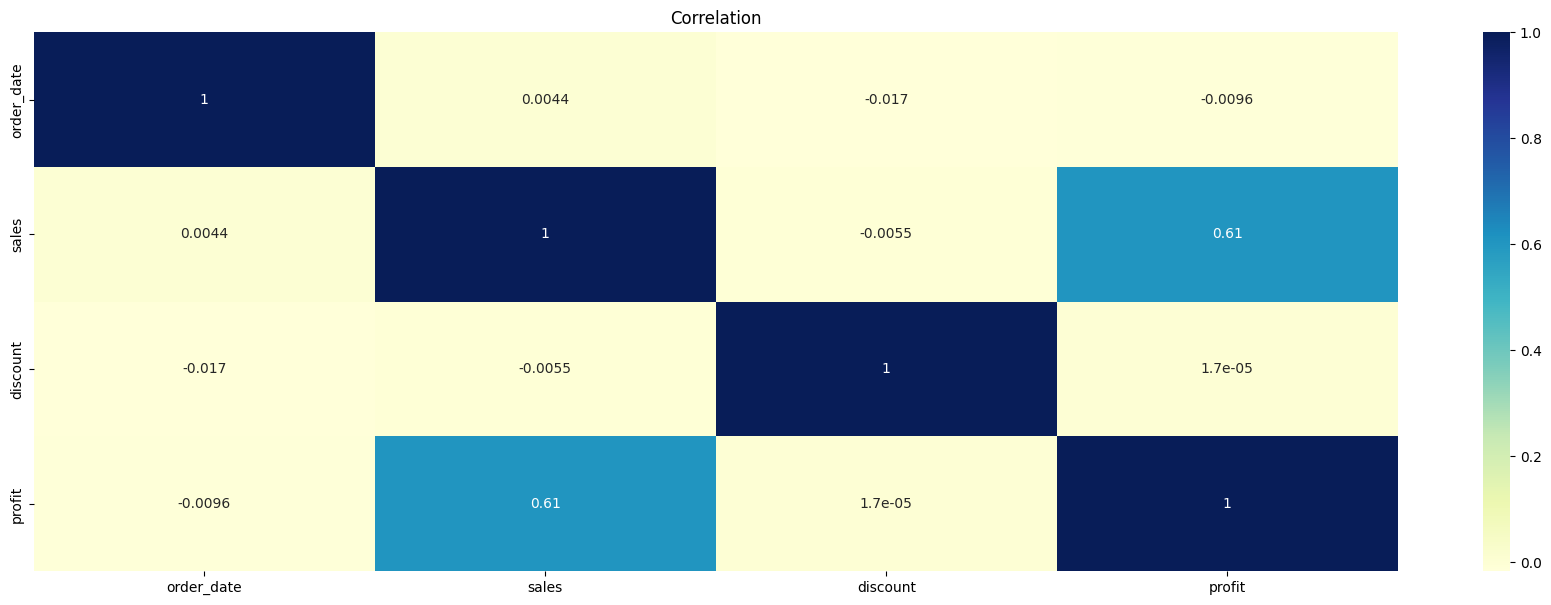

In [287]:
plt.figure(figsize=(22,7))
sns.heatmap(numeric_data.corr(),annot=True ,cmap='YlGnBu')
plt.title("Correlation")
plt.show()

###### The heatmap shows relationships between variables.
###### Sales and profit have the strongest correlation (≈ 0.61).
###### All other variables show weak or near-zero correlation.

### Feature Selection

In [288]:
data.head(3)

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state,Order_Day,Order_Month,Order_year,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11,8,2017,8,August,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11,8,2017,8,August,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,6,12,2017,12,December,2017


In [289]:
data = data.drop(columns = ['order_id','customer_name','order_date','month_no','Month','year'])
data.head(3)

,category,sub_category,city,region,sales,discount,profit,state,Order_Day,Order_Month,Order_year
0,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,11,8,2017
1,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,11,8,2017
2,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,6,12,2017


## Label Encoding

In [290]:
from sklearn.preprocessing import LabelEncoder

In [291]:
# convert categorical vatiable in to numerical 
li = LabelEncoder()
data['category'] = li.fit_transform(data[['category']])
data['sub_category'] = li.fit_transform(data[['sub_category']])
data['city'] = li.fit_transform(data[['city']])
data['region'] = li.fit_transform(data[['region']])
data['state'] = li.fit_transform(data[['state']])

In [292]:
data.head(3)

,category,sub_category,city,region,sales,discount,profit,state,Order_Day,Order_Month,Order_year
0,5,14,21,2,1254,0.12,401.28,0,11,8,2017
1,1,13,8,3,749,0.18,149.80,0,11,8,2017
2,3,0,13,4,2360,0.21,165.20,0,6,12,2017


## Feature Scalling And Model Building

In [293]:
data.head(3)

,category,sub_category,city,region,sales,discount,profit,state,Order_Day,Order_Month,Order_year
0,5,14,21,2,1254,0.12,401.28,0,11,8,2017
1,1,13,8,3,749,0.18,149.80,0,11,8,2017
2,3,0,13,4,2360,0.21,165.20,0,6,12,2017


In [294]:
# Select Features And Target VAriable 
x = data.drop(columns = ['sales'])
y = data['sales']

In [295]:
# feature scalling
from sklearn.preprocessing import StandardScaler   # making all numerical features comparable so the machine learning model performs fairly and efficiently.

In [296]:
std = StandardScaler()

In [328]:
X = std.fit_transform(x)

In [330]:
y

0       1254
1        749
2       2360
3        896
4       2355
        ... 
9989     945
9990    1195
9991    1567
9992    1659
9993    1034
Name: sales, Length: 9994, dtype: int64

In [298]:
# Now Convert in to data frame 
X = pd.DataFrame(std.fit_transform(x), columns=x.columns)
X.head(4)

,category,sub_category,city,region,discount,profit,state,Order_Day,Order_Month,Order_year
0,0.988438,0.435711,1.380810,-0.032603,-1.431246,0.109798,0.0,-0.632887,0.240773,0.247234
1,-1.003687,0.285938,-0.494753,0.581013,-0.627304,-0.938381,0.0,-0.632887,0.240773,0.247234
2,-0.007624,-1.661110,0.226617,1.194629,-0.225333,-0.874193,0.0,-1.252944,1.407600,0.247234
3,0.490407,0.136165,-1.071849,0.581013,0.310629,-1.189297,0.0,-0.756899,1.115893,-0.642843


In [299]:
# Split the data in to train and test
from sklearn.model_selection import train_test_split

In [300]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.02,random_state=52)

In [301]:
X_train.head()

,category,sub_category,city,region,discount,profit,state,Order_Day,Order_Month,Order_year
3789,-1.501719,-1.361564,0.659440,-0.646218,-0.761294,0.770099,0.0,0.855249,-0.342640,0.247234
8101,0.988438,1.633895,1.380810,-1.259834,-1.297256,-0.314258,0.0,-1.873001,-1.217760,0.247234
3084,-1.003687,1.484122,-0.061931,1.194629,1.382552,-0.105689,0.0,0.483215,1.407600,-1.532920
8230,0.988438,1.633895,-0.350479,-0.646218,-1.565237,-0.267326,0.0,-0.880910,-0.050933,-1.532920
5583,-1.501719,-1.211791,-0.061931,1.194629,0.176638,0.136390,0.0,-1.004921,-0.050933,1.137310


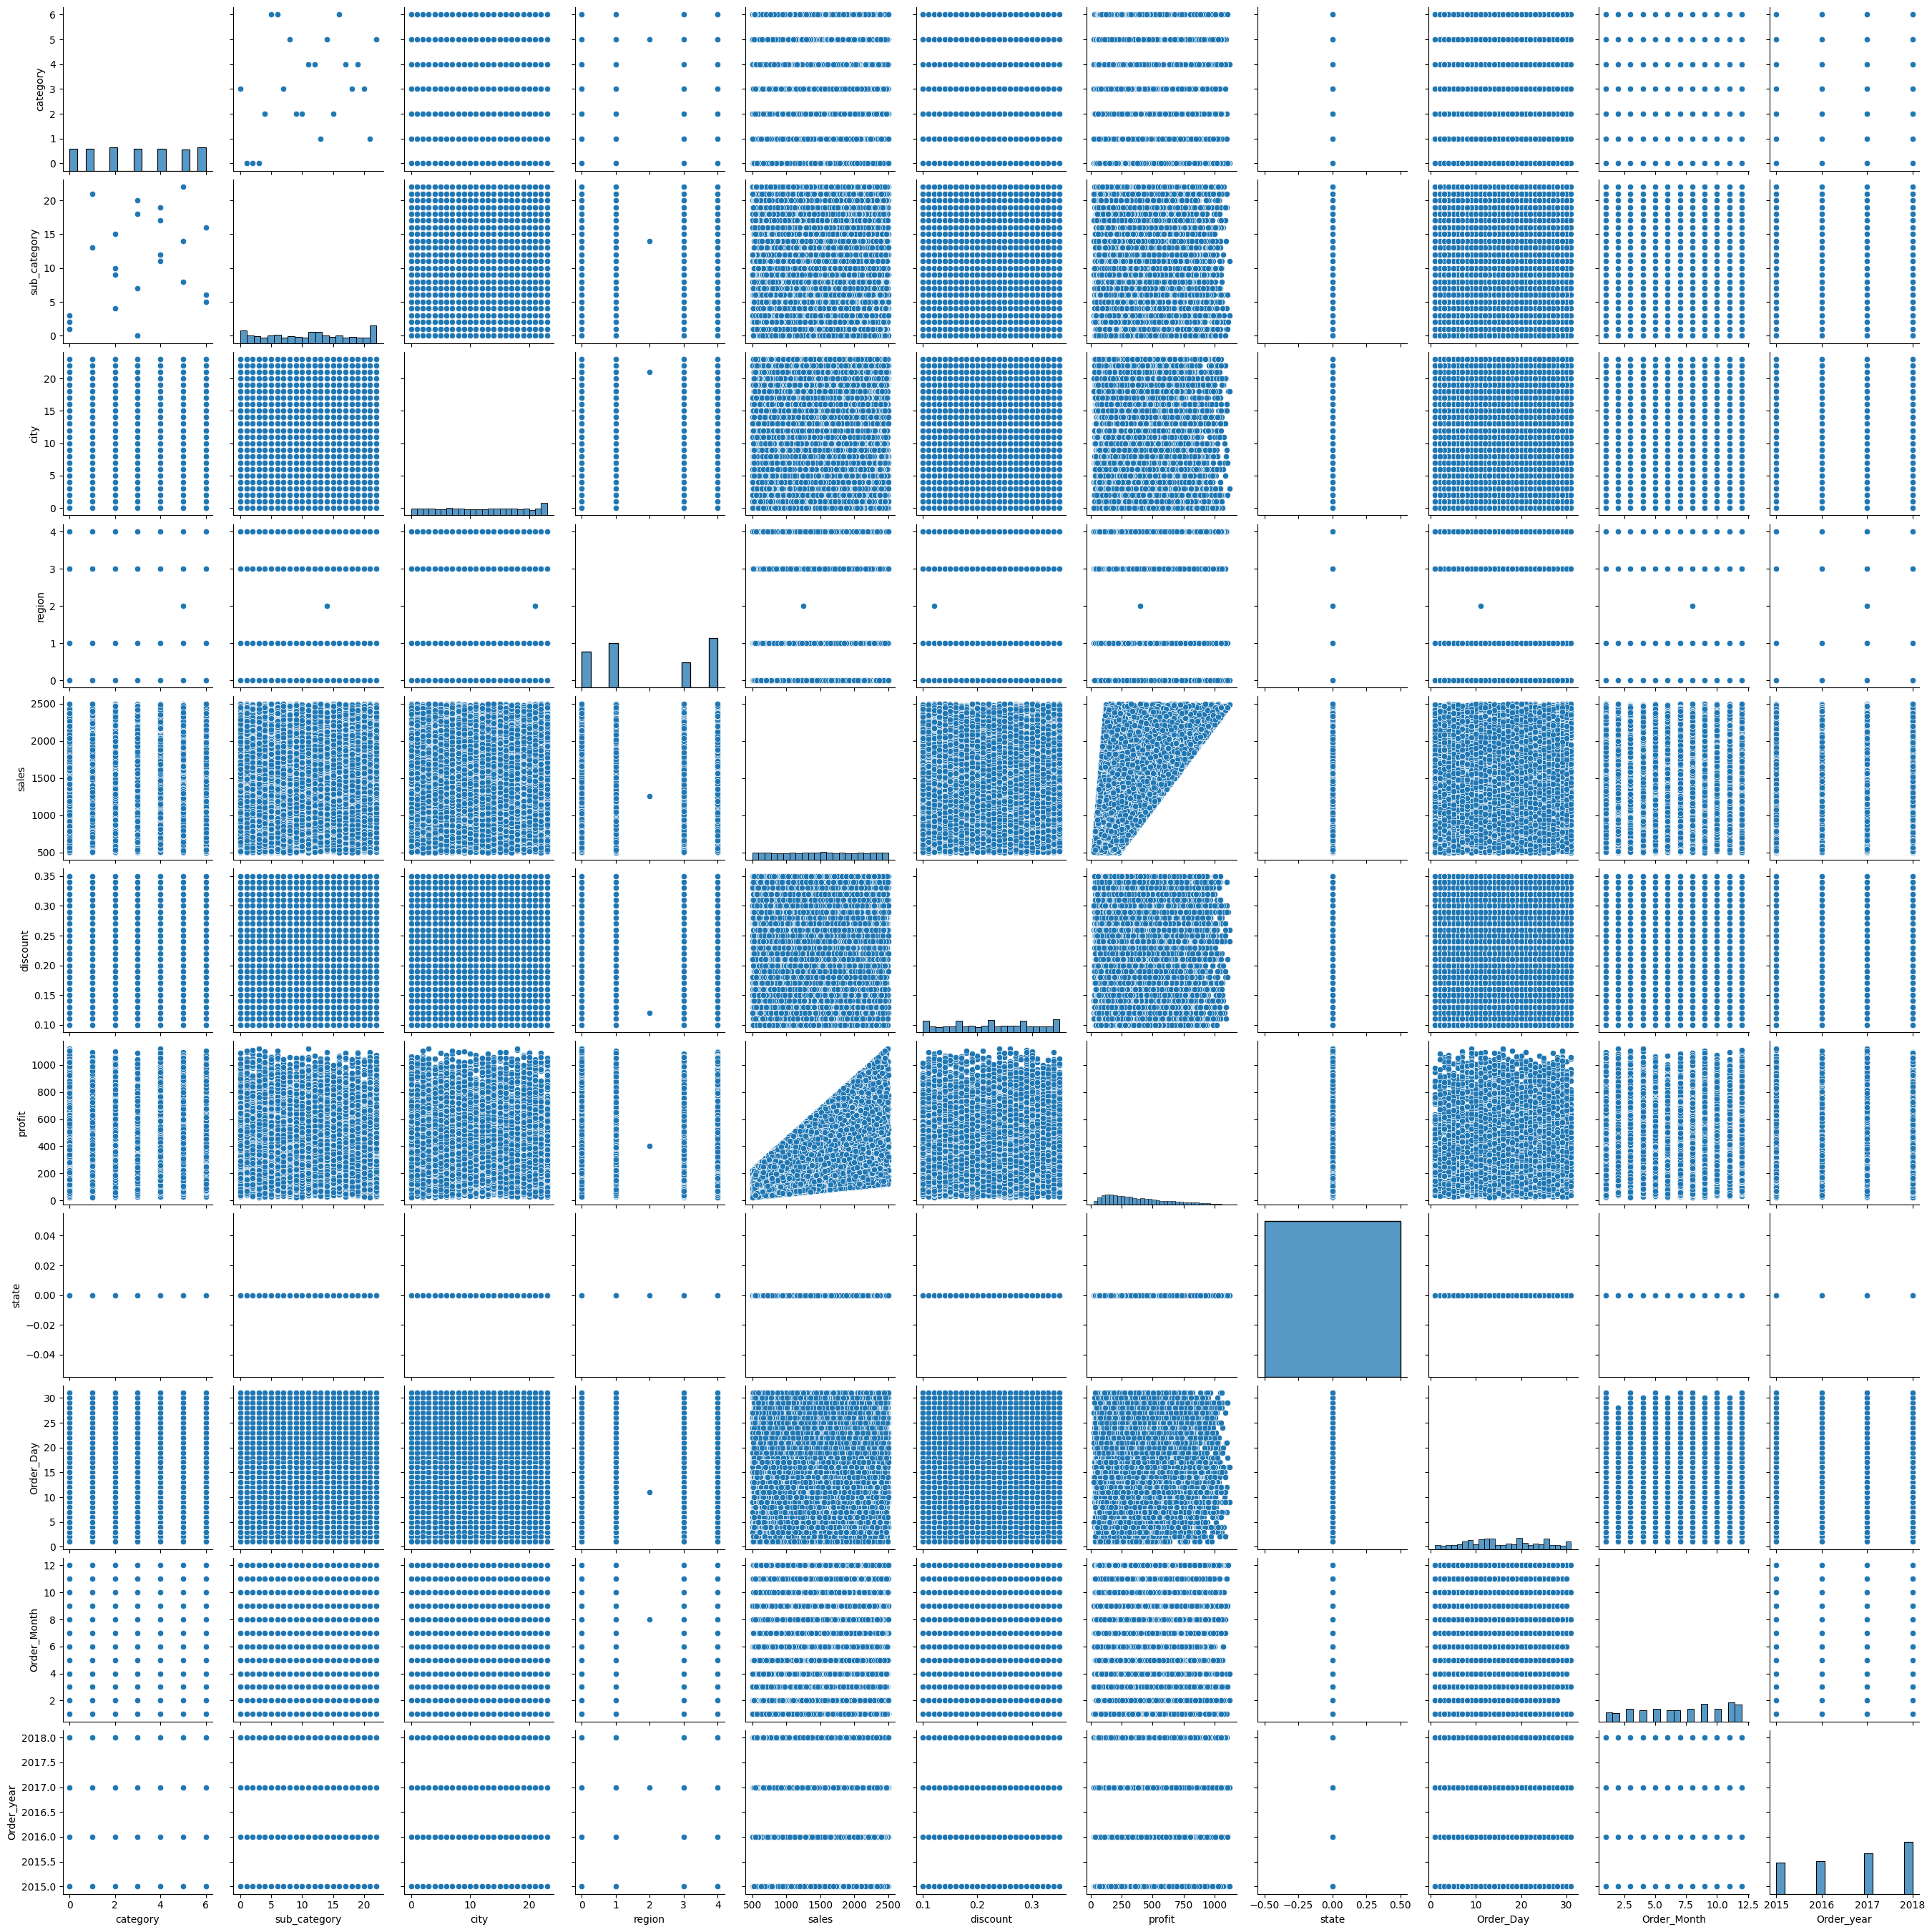

In [302]:
# lets see the behaviour of the data
sns.pairplot(data)
plt.show()

## Model Apply

### 1 Train Linear Regression Model 

In [346]:
from sklearn.linear_model import LinearRegression

In [347]:
# initialize the model 
model = LinearRegression()

In [348]:
# train the model 
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [349]:
# prdeict 
y_pred = model.predict(X_test)

In [350]:
model.score(X_test, y_test)*100 , model.score(X_train, y_train)*100

(23.918623094634683, 36.900185988145495)

#### This model is not giving us beat aquracy try an other model for best aquracy 

### 2 Decision Tree

In [308]:
# Dession Treee
from sklearn.tree import DecisionTreeRegressor

In [338]:
dt = DecisionTreeRegressor(criterion="squared_error",
    max_depth=6,
    random_state=42
)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)*100 , dt.score(X_train,y_train)*100

(23.99280493585625, 39.917541241228804)

### 3 Random Forest

In [311]:
# random forest 
from sklearn.ensemble import RandomForestRegressor

In [339]:
ri = RandomForestRegressor(n_estimators=10)
ri.fit(X_train,y_train)
ri.score(X_train,y_train)*100 , ri.score(X_test,y_test)*100

(87.36999255630373, 13.361236709182723)

### 4 Logistic Regression

In [340]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

In [341]:
lo = LogisticRegression()
lo.fit(X_train, y_train)
lo.score(X_test, y_test)*100 , lo.score(X_train, y_train)*100

(0.0, 2.236062895650398)

### 5 XGB Regressor

In [342]:
# XGBRegressor
from xgboost import XGBRegressor

In [343]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)*100 , xgb.score(X_train, y_train)*100

(20.514190196990967, 64.56629037857056)

In [367]:
y_pred = model.predict(X_test)

### Evaluate the Model

In [368]:
# Aquracy Check 
from sklearn.metrics import r2_score,mean_squared_error

In [369]:
r2 = r2_score(y_test, y_pred)
mean = mean_squared_error(y_test,y_pred)
print(f"the value of mean:{mean}")
print(f"the value of r2:{r2}")

the value of mean:236380.60609446105
the value of r2:0.23918623094634683


### Visualize the Results

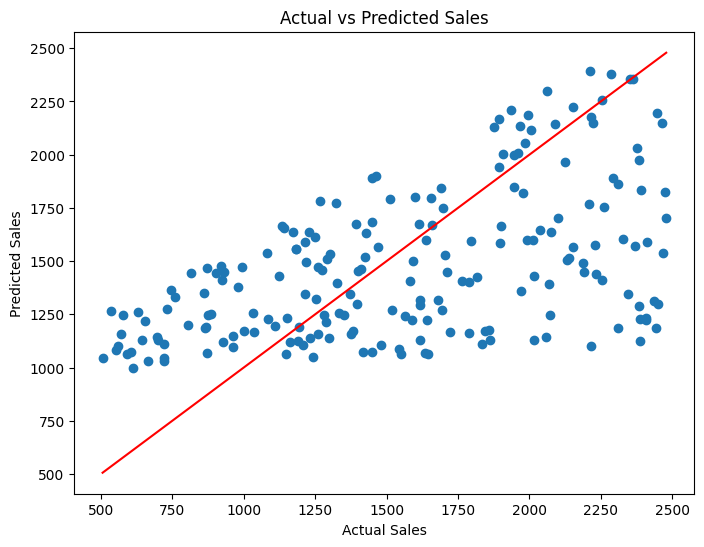

In [370]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales') 
plt.show()

In [374]:
# Display Actual vs Predicted values for the fist 10 samples 
Comparision = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}) 
print(Comparision.head(10))

   Actual    Predicted
0    1266  1781.978629
1    2468  1537.570604
2    1470  1564.951918
3    2013  1597.442201
4    1191  1126.569211
5    1328  1396.183862
6    2285  2378.425926
7     666  1031.731685
8     816  1445.412956
9    2309  1187.805226


## Conclusion

### In this project, I performed feature selection and experimented with multiple machine learning algorithms including `XGBRegressor`, `Decision Tree Regressor`, `Random Forest Regressor`,`Logistic Regression`, and `Linear Regression` to predict sales.

After evaluating all models using Mean Squared Error (MSE) and R-squared (R²) metrics, Linear Regression achieved the best performance, with:

* `MSE: 236380.60`

* `R²: 0.36`

Although the model performance is relatively low, extensive experimentation with both linear and non-linear algorithms did not result in significant improvement. This indicates that the target variable (sales) has weak dependency on the available features, and key business-driving factors such as pricing structure, quantity sold, promotions, and customer behavior were not present in the dataset.

This project highlights a real-world machine learning insight:
trying more complex models does not always guarantee better performance when feature relevance and data quality are limited.

Overall, the project demonstrates strong understanding of model experimentation, performance evaluation, and practical limitations of predictive modeling, which is a critical aspect of applied data science.